# Лабораторная лабота 5. Чукарев Михаил
## Численное интегрирование

In [1]:
import sympy as smp
import numpy as np


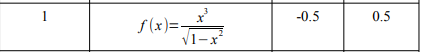

In [16]:
x = smp.Symbol('x')
F = x**3/smp.sqrt(1-x**2)
interval = [-0.5, 0.5]
a = interval[0]
b = interval[1]
epsilon = 0.001

In [17]:
def maxM(f, a, b):
    x = smp.Symbol('x')
    x_arr = np.linspace(a, b + 0.0000001, 1000)
    f2 = []
    for xi in x_arr:
        f2.append(np.abs(f.subs(x, xi).evalf()))
    return float(max(f2))

In [18]:
f1 = smp.diff(F, x)
f2 = smp.diff(f1, x)
h = (b -a)/4
M = maxM(f2, a, b)

while M*np.abs(b-a)*h**2/12 >= epsilon:
    h /= 4

print('Шаг интегрирования h = ', h)


Шаг интегрирования h =  0.015625


### Вычисление интеграла по формуле трапеций

In [19]:
def trap(h):
    int_trap = 0
    y = []
    for xi in np.arange(a, b + 0.0000001, h):
        y.append(F.subs(x, xi).evalf())

    for i in range(1, len(y) - 1):
        int_trap += y[i]

    int_trap += (y[0] + y[len(y) - 1])/2
    int_trap *= h
    return int_trap

In [21]:
In = trap(h)
print('С шагом h =', In)
I2n = trap(2*h)
print('С шагом 2h =', I2n)
print('Оценка погрешности =', (1/3)*np.abs(In - I2n))
print('Вычисленный интеграл:', smp.integrate(F, (x, interval[0], interval[1])), '=', smp.integrate(F, (x, interval[0], interval[1])).evalf())

С шагом h = -1.73472347597681e-18
С шагом 2h = 4.33680868994202e-19
Оценка погрешности = 7.22801448323670e-19
Вычисленный интеграл: 0 = 0


### Вычисление интеграла по формуле Симпсона

In [22]:
def simpson(h):
    int_simp = 0
    y = []
    for xi in np.arange(a, b + 0.0000001, h):
        y.append(F.subs(x, xi).evalf())

    for i in range(1, len(y) - 1, 2):
        int_simp += 4*y[i]
        
    for i in range(2, len(y) - 2, 2):
        int_simp += 2*y[i]

    int_simp += y[0] + y[len(y) - 1]
    int_simp *= h/3
    return int_simp

In [23]:
In = simpson(h)
print('С шагом h =', In)
I2n = simpson(2*h)
print('С шагом 2h =', I2n)
print('Оценка погрешности =', (1/15)*np.abs(In - I2n))
print('Вычисленный интеграл:', smp.integrate(F, (x, interval[0], interval[1])), '=', smp.integrate(F, (x, interval[0], interval[1])).evalf())

С шагом h = 1.44560289664734e-19
С шагом 2h = -2.89120579329468e-18
Оценка погрешности = 2.02384405530627e-19
Вычисленный интеграл: 0 = 0


### Вычисление по формуле Ньютона-Лейбница

In [24]:
F_int = smp.integrate(F, x)
print('Неопределенный интеграл:', F_int)
print(f'{F_int.subs(x, b)} - {F_int.subs(x, a)} = {F_int.subs(x, b) - F_int.subs(x, a)} ={(F_int.subs(x, b) - F_int.subs(x, a)).evalf()}')

Неопределенный интеграл: -x**2*sqrt(1 - x**2)/3 - 2*sqrt(1 - x**2)/3
-0.649519052838329 - -0.649519052838329 = 0 =0
